# Lab 6-2: Bayesian Statistics


### Example Problem of Student Quiz Scores

In this example we are trying to figure out the probability of an event occcuring, the probability of a student getting a question right on a quiz. (Note: this problem is designed to help you answer homework 6's problem about flooding in New York City. In the homework, you will try to figure out the probability of a flood occuring in a given year.)

#### Background Info for the problem:
* A student correctly answers 5 out 10 questions on the first exam in a class. On the second exam, the student correctly answers 8 of 10 questions.

* From past experience, students in the class on average answer 85% of questions correctly with a standard deviation of 10%. We can assume this is normally distributed.

* **What fraction of the questions will the student likely answer correctly in the long run?**

* **How does this estimate change with each exam?**

---

In [1]:
import numpy as np
import scipy.stats as stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

%matplotlib inline

Our Bayes' Theorem equation is:

$P(A|B) = \displaystyle\frac{P(B|A) \cdot P(A)}{P(B)}$

**Create our prior PDF**, $P(A)$, knowing that students typically get 85% on exams, with a standard deviation of 10%.

In [2]:
# Our prior assumption of mean student frequency of correct answer must be between 0 and 1 (85% average test score)
mu = 0.85
# Our prior assumption of standard deviation of student scores (10% standard deviation of test score)
sigma = 0.1
# create x values over which to calculate the distribution (we'll just work in whole percentage points here)
# (x evenly spaced with 101 values between 0 and 1 (inclusive))
x = np.linspace(0, 1, 101)
# Bayesian prior distribution based on past students (normalized so that the area under the curve = 1)
pdf = stats.norm.pdf(x, mu, sigma)

# this is the pdf of P(A)
prior_pdf = pdf / np.sum(pdf)
# and the cdf
prior_cdf = np.cumsum(prior_pdf)

We can find the expected test score value by multiplying the prior_pdf by the test score values (x):

In [3]:
prior_expected = np.sum(prior_pdf * x)
print("expected value: {}".format( np.round(prior_expected,2)))

expected value: 0.84


And we can find the upper and lower 95% confidence limits using the cdf.

In [4]:
f = interp1d(prior_cdf, x)
upper = f(0.975)
lower = f(0.025)
print("upper: {}".format( np.round(upper,2)))
print("lower: {}".format( np.round(lower,2)))

upper: 0.98
lower: 0.65


To find the cumulative probability value that corresponds to our prior expected, we can also use the interp1d function to look it up on the cdf.

In [5]:
g = interp1d(x, prior_cdf)

prior_expected_cdf = g(prior_expected)

In [6]:
prior_expected_cdf

array(0.49927539)

Plot the prior distribution

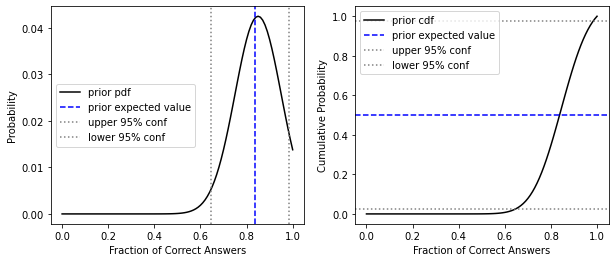

In [7]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,4))

ax1.plot(x,prior_pdf, 'k', label='prior pdf')
ax1.axvline(prior_expected, linestyle='--', color='b', label='prior expected value')
ax1.axvline(upper, linestyle=':', color='grey', label='upper 95% conf')
ax1.axvline(lower, linestyle=':', color='grey', label='lower 95% conf')
ax1.set_xlabel('Fraction of Correct Answers')
ax1.set_ylabel('Probability')
ax1.legend(loc='center left')

ax2.plot(x,prior_cdf, 'k', label='prior cdf')
ax2.axhline(prior_expected_cdf, linestyle='--', color='b', label='prior expected value')
ax2.axhline(0.975, linestyle=':', color='grey', label='upper 95% conf')
ax2.axhline(0.025, linestyle=':', color='grey', label='lower 95% conf')
ax2.set_xlabel('Fraction of Correct Answers')
ax2.set_ylabel('Cumulative Probability')
ax2.legend(loc='upper left')

---
**The student takes their first exam**

The student gets 5 out of 10 questions right on their first exam. 

Create the pdf representing the likelihood of getting this score, $P(B|A)$. This comes from a [binomial distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).

In [8]:
# this is our P(B|A)
likelihood = stats.binom.pmf(5, 10, x)

We can plot this likelihood distribution on top of our prior to see what it looks like

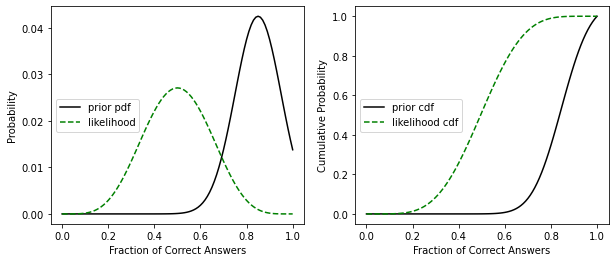

In [9]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,4))

ax1.plot(x,prior_pdf, 'k', label='prior pdf')
ax1.plot(x,likelihood/np.sum(likelihood), 'g--', label='likelihood') # note that I'm temporarily normalizing the likelihood PDF plot here
ax1.set_xlabel('Fraction of Correct Answers')
ax1.set_ylabel('Probability')
ax1.legend(loc='center left')

ax2.plot(x,prior_cdf, 'k', label='prior cdf')
ax2.plot(x,np.cumsum(likelihood/np.sum(likelihood)), 'g--', label='likelihood cdf') # note that I'm temporarily normalizing the likelihood CDF plot here
ax2.set_xlabel('Fraction of Correct Answers')
ax2.set_ylabel('Cumulative Probability')
ax2.legend(loc='center left')

Multiply by our prior distribution to get $P(B|A) \cdot P(A)$

In [10]:
# this is  P(B|A)*P(A)
likelihood_prior = likelihood * prior_pdf

However, this isn't our posterior pdf yet. We need to normalize by dividing by $P(B)$. 

And we can calculate this using the chain rule: $P(B) = \displaystyle\sum{P(B|A_i)P(A_i)}$ which in our case is the sum of all likelihood * prior_pdf.

This finally gives us the posterior pdf, $P(A|B)$

In [11]:
# this gives us P(A|B)
post_pdf = likelihood_prior / np.nansum(likelihood_prior)
post_cdf = np.cumsum(post_pdf)

And we can compute the expected value, and upper and lower confidence intervals for 95%

In [12]:
post_expected = np.sum(post_pdf * x)
print("expected value: {}".format( np.round(post_expected,2)))

f = interp1d(post_cdf, x)
post_upper = f(0.975)
post_lower = f(0.025)
print("upper: {}".format( np.round(post_upper,2)))
print("lower: {}".format( np.round(post_lower,2)))

expected value: 0.72
upper: 0.85
lower: 0.57


Plot the prior pdf and posterior pdf

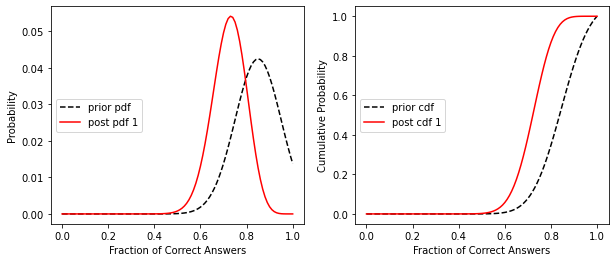

In [13]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,4))

ax1.plot(x,prior_pdf, '--k', label='prior pdf')
ax1.plot(x,post_pdf, 'r', label='post pdf 1')
ax1.set_xlabel('Fraction of Correct Answers')
ax1.set_ylabel('Probability')
ax1.legend(loc='center left')


ax2.plot(x,prior_cdf, '--k', label='prior cdf')
ax2.plot(x,post_cdf, 'r', label='post cdf 1')
ax2.set_xlabel('Fraction of Correct Answers')
ax2.set_ylabel('Cumulative Probability')
ax2.legend(loc='center left')

---

**The student takes their second exam**

For the next iteration of Bayes' Theorem, we use the posterior pdf as our new prior pdf.




In [14]:
# this is the pdf of P(A), which was our posterior above, P(A|B)
prior_pdf2 = post_pdf.copy()
# and the cdf
prior_cdf2 = np.cumsum(prior_pdf2)

On their second exam, the student gets 8 out of 10 correct.

Create the pdf representing the likelihood of getting this score, $P(B|A)$.

In [15]:
# this is our P(B|A)
likelihood2 = stats.binom.pmf(8, 10, x)

Multiply by our prior distribution to get $P(B|A) \cdot P(A)$

In [16]:
# this is  P(B|A)*P(A)
likelihood_prior2 = likelihood2 * prior_pdf2

Normalize by dividing by $P(B)$. 

And we can calculate this using the chain rule: $P(B) = \displaystyle\sum{P(B|A_i)P(A_i)}$ which in our case is the sum of all likelihood * prior_pdf.

This finally gives us the posterior pdf, $P(A|B)$

In [17]:
# this gives us P(A|B)
post_pdf2 = likelihood_prior2 / np.nansum(likelihood_prior2)
post_cdf2 = np.cumsum(post_pdf2)

Compute the expected value, and upper and lower confidence intervals for 95%

In [18]:
post_expected2 = np.sum(post_pdf2 * x)
print("expected value: {}".format( np.round(post_expected2,2)))

f = interp1d(post_cdf2, x)
post_upper2 = f(0.975)
post_lower2 = f(0.025)
print("upper: {}".format( np.round(post_upper2,2)))
print("lower: {}".format( np.round(post_lower2,2)))

expected value: 0.74
upper: 0.85
lower: 0.6


Plot the prior pdf and posterior pdf

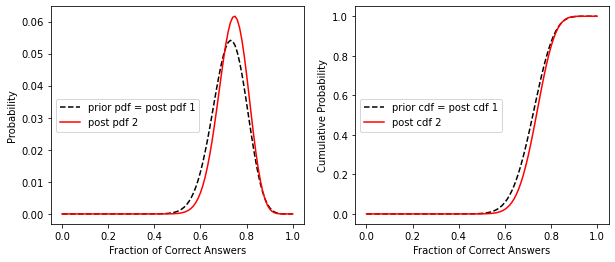

In [19]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,4))

ax1.plot(x,prior_pdf2, '--k', label='prior pdf = post pdf 1')
ax1.plot(x,post_pdf2, 'r', label='post pdf 2')
ax1.set_xlabel('Fraction of Correct Answers')
ax1.set_ylabel('Probability')
ax1.legend(loc='center left')

ax2.plot(x,prior_cdf2, '--k', label='prior cdf = post cdf 1')
ax2.plot(x,post_cdf2, 'r', label='post cdf 2')
ax2.set_xlabel('Fraction of Correct Answers')
ax2.set_ylabel('Cumulative Probability')
ax2.legend(loc='center left')

---

**Plot the original distribution, and our two updates all together**

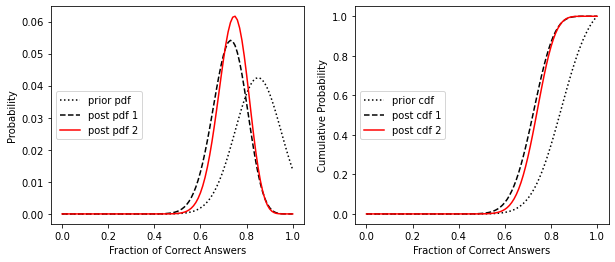

In [20]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,4))

ax1.plot(x,prior_pdf, ':k', label='prior pdf')
ax1.plot(x,prior_pdf2, '--k', label='post pdf 1')
ax1.plot(x,post_pdf2, 'r', label='post pdf 2')
ax1.set_xlabel('Fraction of Correct Answers')
ax1.set_ylabel('Probability')
ax1.legend(loc='center left')

ax2.plot(x,prior_cdf, ':k', label='prior cdf')
ax2.plot(x,prior_cdf2, '--k', label='post cdf 1')
ax2.plot(x,post_cdf2, 'r', label='post cdf 2')
ax2.set_xlabel('Fraction of Correct Answers')
ax2.set_ylabel('Cumulative Probability')
ax2.legend(loc='center left')

---

**What fraction of the questions will the student likely answer correctly in the long run?**

**How does this estimate change with each exam?**

The answer to these questions is just our expected value from the posterior pdfs after each of the two updates:

In [21]:
print("prior expected value: {}%".format(100*np.round(prior_expected,2)))
print("posterior expected value after 1st exam: {}%".format(100*np.round(post_expected,2)))
print("posterior expected value after 2nd exam: {}%".format(100*np.round(post_expected2,2)))

prior expected value: 84.0%
posterior expected value after 1st exam: 72.0%
posterior expected value after 2nd exam: 74.0%


---

**What if we had used frequentist statistics,** and therefore determined the student's expected exam value only based on their performance on the two exams so far?

The non-Bayesian sample mean and standard deviation are based on the two completed exams, using sample size of 2x10=20, where each question is considered independent.

Our expected value is then the sum of all correct answers over the sum of all questions across all exams so far: $\bar{p} = \displaystyle\sum^m{\frac{c}{n}}=\frac{5+8}{2\times10}$

In [22]:
# this is expected p (student's probability of correct answer), number of successes divided by, the number of questions per test times the number of tests
p_bar = (5+8) / (10+10)

Because each question has only two states, correct or incorrect (1 or 0), we use the standard deviation of a binomial distribution to create the PDF:

For example, over $n$ trials, the variance of the number of successes/failures is measured by $\sigma^2 = n\cdot p \cdot(1-p)$

And the variance of the probability of success is the above variance divided by $n^2$

So $\sigma_p= \sqrt{(\sigma^2/n^2)} = \sqrt{(p\cdot(1-p)/n)} $

In [23]:
sigma_p = np.sqrt(p_bar*(1-p_bar)/(10+10))

# create the PDF
nonBayes_pdf = stats.norm.pdf(x, p_bar, sigma_p)
nonBayes_pdf = nonBayes_pdf / np.nansum(nonBayes_pdf)
# compute the CDF from a cumulative sum of the PDF
nonBayes_cdf = np.cumsum(nonBayes_pdf)

Now plot the prior pdf, the bayesian pdf after the two exams, and the non-bayesian PDF for our student who's completed two tests so far:

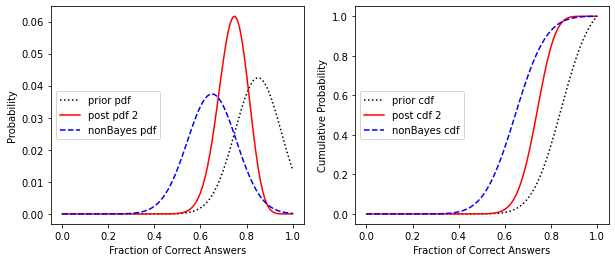

In [24]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,4))

ax1.plot(x,prior_pdf, ':k', label='prior pdf')
ax1.plot(x,post_pdf2, 'r', label='post pdf 2')
ax1.plot(x,nonBayes_pdf, '--b', label='nonBayes pdf')
ax1.set_xlabel('Fraction of Correct Answers')
ax1.set_ylabel('Probability')
ax1.legend(loc='center left')

ax2.plot(x,prior_cdf, ':k', label='prior cdf')
ax2.plot(x,post_cdf2, 'r', label='post cdf 2')
ax2.plot(x,nonBayes_cdf, '--b', label='nonBayes cdf')
ax2.set_xlabel('Fraction of Correct Answers')
ax2.set_ylabel('Cumulative Probability')
ax2.legend(loc='center left')